<a href="https://colab.research.google.com/github/glawrie/CM370-Machine-Learning-AI/blob/main/CM3710_Gillian_Lawrie_2228914_Assessment_Component_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CM3710 Machine Learning and Artificial Intelligence

Assessment component 2

Gillian Lawrie (2228914)

**Musculoskeletal appointment waiting times: Predicting future referral numbers**

##Section 1 - Data & pre-processing



---



# 1.1 Introduction

**Task**: Build a model to predict future AHP MSK monthly referral numbers to allow the service to anticipate demand and plan resources accordingly.

**Data**: csv file "open_data_ahp_msk_referrals_monhtly_june2024" from https://opendata.scot/datasets/public+health+scotland-allied+health+professionals+-+musculoskeletal+waiting+times/

The csv file contains monthly data on referrals to AHP MSK services at health board level broken down by referral source.

The input file contains 85,050 rows (excluding headers). The features from the dataset that will be used in building AI models are:

* Month: The reference period as month (YYYYMM)
* HBT: 9-digit code for health board of treatment and country code for Scotland
* Spciality: Data is presented as for All Specialties, Chiropody/Podiatry, Occupational Therapy, Orthotics and Physiotherapy
* ReferralSource: The source of the patients referral
* NumberOfReferrals: Number of patients who were referred to hospital for treatment

---



# 1.2 Pre-processing the data
The data has to be cleaned to remove rows where the NumberOfReferrals is blank, NumberOfReferralsQF is "d" (rows with this qualifier signifies that a figure is derived for custom groupings or totals - it is not possible to identify how the referral numbers for these rows has been derived, and they therefore need to be removed). Categorical text (object) fields must be converted to numerical (integers) to allow the models to run. The Month needs to be split out as MonthAsNumber and Year.

In [ ]:
import pandas as pd # pandas to view data in dataframes
import io #io used to load the data after uploading (as colab uses dictionaries to store uploaded files)
from google.colab import files #finally, we import the files package from google.colab framework to be able to upload files

uploaded = files.upload() #call the upload() function to give us the opportunity to load a file into our script

Saving open_data_ahp_msk_referrals_monthly_june2024.csv to open_data_ahp_msk_referrals_monthly_june2024.csv


In [ ]:
# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]

# Use the correct filename to access the file content
Monthly_referrals_unprocessed = io.BytesIO(uploaded[filename])
Monthly_referrals_unprocessed_df = pd.read_csv(Monthly_referrals_unprocessed)


In [ ]:
#details of data before processing
Monthly_referrals_unprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85050 entries, 0 to 85049
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Month                                       85050 non-null  int64  
 1   HBT                                         85050 non-null  object 
 2   Specialty                                   85050 non-null  object 
 3   ReferralSource                              85050 non-null  object 
 4   NumberOfReferrals                           59397 non-null  float64
 5   NumberOfReferralsQF                         42746 non-null  object 
 6   ReferralsPerOneHundredThousandPopulation    57924 non-null  float64
 7   ReferralsPerOneHundredThousandPopulationQF  27126 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.2+ MB


In [ ]:
Monthly_referrals_unprocessed_df = Monthly_referrals_unprocessed_df[Monthly_referrals_unprocessed_df.NumberOfReferralsQF != 'd'] #drop rows where the NumberOfReferralsQF is "d"
Monthly_referrals_unprocessed_df = Monthly_referrals_unprocessed_df.dropna(subset=['NumberOfReferrals']) #drop rows where the NumberOfReferrals is blank
Monthly_referrals_unprocessed_df = Monthly_referrals_unprocessed_df.drop(columns=['ReferralsPerOneHundredThousandPopulation', 'ReferralsPerOneHundredThousandPopulationQF', 'NumberOfReferralsQF']) #drop columns that will not be used
Monthly_referrals_unprocessed_df['Year'] = Monthly_referrals_unprocessed_df['Month'].astype(str).str[:4].astype(int) #extract Year from Month
Monthly_referrals_unprocessed_df['MonthAsNumber'] = Monthly_referrals_unprocessed_df['Month'].astype(str).str[4:].astype(int) #extract month as a number from Month

#converting text column contents to numerical data
Monthly_referrals_unprocessed_df['HBT'] = Monthly_referrals_unprocessed_df['HBT'].str[1:] # Trim the 'HBT' column to remove the first character

specialty_mapping = {
    "Chiropody/Podiatry": "1",
    "Occupational Therapy": "2",
    "Orthotics": "3",
    "Physiotherapy": "4"
}
Monthly_referrals_unprocessed_df['Specialty'] = Monthly_referrals_unprocessed_df['Specialty'].replace(specialty_mapping) # convert contents of Specialty to numeric values

referral_source_mapping = {
    "Accident and Emergency Department": "1",
    "Allied Health Professional (AHP)": "2",
    "Community Health Service (excludes Optometrist/Optician)": "3",
    "Community Health Service (excluding Optometrist/Optician and Allied Health Professional (AHP))": "4",
    "Consultant at this Health Board/Health Care Provider": "5",
    "Consultant from a Health Board/Health Care Provider outwith this Health Board area": "6",
    "Dental Practitioner": "7",
    "GP": "8",
    "Judicial": "9",
    "Local Authority/Voluntary Agency": "10",
    "NHS24": "11",
    "Not Provided": "12",
    "Optometrist/Optician": "13",
    "Other (includes Armed Forces)": "14",
    "Patient Initiated Return": "15",
    "Prison/Penal Establishments": "16",
    "Self referral": "17"
}
Monthly_referrals_unprocessed_df['ReferralSource'] = Monthly_referrals_unprocessed_df['ReferralSource'].replace(referral_source_mapping) #convert contents of ReferralSource to numeric values

Monthly_referrals_unprocessed_df['HBT'] = Monthly_referrals_unprocessed_df['HBT'].astype(int)
Monthly_referrals_unprocessed_df['Specialty'] = Monthly_referrals_unprocessed_df['Specialty'].astype(int)
Monthly_referrals_unprocessed_df['ReferralSource'] = Monthly_referrals_unprocessed_df['ReferralSource'].astype(int)

#Pre-processing complete: rename file to "Monthly_referrals_processed_df"

Monthly_referrals_processed_df = Monthly_referrals_unprocessed_df

##details of data after processing
Monthly_referrals_processed_df.info()
Monthly_referrals_processed_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 42304 entries, 270 to 85031
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              42304 non-null  int64  
 1   HBT                42304 non-null  int64  
 2   Specialty          42304 non-null  int64  
 3   ReferralSource     42304 non-null  int64  
 4   NumberOfReferrals  42304 non-null  float64
 5   Year               42304 non-null  int64  
 6   MonthAsNumber      42304 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.6 MB


,Month,HBT,Specialty,ReferralSource,NumberOfReferrals,Year,MonthAsNumber
count,42304.000000,4.230400e+04,42304.000000,42304.000000,42304.000000,42304.000000,42304.000000
mean,202122.899608,8.000024e+06,2.621620,8.998014,35.595759,2021.166202,6.279430
std,150.427305,5.786867e+00,1.173829,4.899462,188.221066,1.507864,3.507011
min,201901.000000,8.000015e+06,1.000000,1.000000,0.000000,2019.000000,1.000000
25%,202005.000000,8.000019e+06,1.000000,5.000000,0.000000,2020.000000,3.000000
50%,202108.000000,8.000025e+06,3.000000,9.000000,0.000000,2021.000000,6.000000
75%,202212.000000,8.000030e+06,4.000000,13.000000,2.000000,2022.000000,9.000000
max,202403.000000,8.000032e+06,4.000000,17.000000,3311.000000,2024.000000,12.000000


# 1.3 Import libraries

In [ ]:
#These are the libraries that will be used in the models in Section 2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statistics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error








---



#Section 2 - AI Algorithms

# 2.1 AI Algorithm 1 - Instance-Based Learning: k-Nearest Neighbour (KNN)

Instance-based learning algorithms rely on direct similarity comparisons between data instances, which is applicable to our task as we want our model to predict referral numbers based on previous referral data.

Using KNN, we will test varying k numbers and metrics to improve model accuracy and determine whether this approach would be suitable for AHP to predict future referral numbers.


In [ ]:
# Access columns by their names
x = Monthly_referrals_processed_df[['Year', 'MonthAsNumber', 'HBT', 'Specialty', 'ReferralSource']].to_numpy()

y = Monthly_referrals_processed_df[['NumberOfReferrals']].to_numpy()

In [ ]:
#Create first KNN Model from data to test whether a basic model works and returns a prediction

KNNmodel1 = KNeighborsClassifier(n_neighbors = 3) #then we instantiate a k nearest neighbour model, with a k value of 1 using the n_neighbours parameter
KNNmodel1.fit(x,y.ravel()) #we then fit our data and labels to the model (remember, there is no 'training' for kNN).

prediction1 = KNNmodel1.predict([[2024,3,8000032,4,17]]) #predictions based Year 2024, MonthAsNumber 3, HBT of 8000032, Speciality of 4, ReferralSource of 17
print(prediction1)

[97.]


In [ ]:
#Model2 - add in cosine metric and distance weights - use train/test for prediction accuracy

y = y.ravel()

acc_score2 = [] #create a list to store the accuracy values
KNNmodel2 = KNeighborsClassifier(n_neighbors=3, metric="cosine", weights="distance") #instantiate the model

kf = StratifiedKFold(n_splits=5) #we instantiate the kfold instance, and set the number of folds to 5
for train, test in kf.split(x,y): #we use a for loop to iterate through each fold using the train and test indexes from the dataset

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test] #things can get a bit weird when inputting indexes to functions, so lets save them as variables

  KNNmodel2.fit(x_train, y_train) #we then only fit the training data
  predictions2 = KNNmodel2.predict(x_test) #and can predict on the test data
  acc = accuracy_score(predictions2, y_test) #we use the accuracy score we imported to give an idea how well the model is doing
  acc_score2.append(acc) #we can append it to our list

print(f"KNN Model2 Accuracy Score: {acc_score2}")




#Model3 with amended k value (from 3 to 5)

acc_score3 = []
KNNmodel3 = KNeighborsClassifier(n_neighbors=5, metric="cosine", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel3.fit(x_train, y_train)
  predictions3 = KNNmodel3.predict(x_test)
  acc = accuracy_score(predictions3, y_test)
  acc_score3.append(acc)

print(f"KNN Model3 Accuracy Score: {acc_score3}")




#Model4 with amended k value (from 5 to 7)

acc_score4 = []
KNNmodel4 = KNeighborsClassifier(n_neighbors=7, metric="cosine", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel4.fit(x_train, y_train)
  predictions4 = KNNmodel4.predict(x_test)
  acc = accuracy_score(predictions4, y_test)
  acc_score4.append(acc)

print(f"KNN Model4 Accuracy Score: {acc_score4}")



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model2 Accuracy Score: [0.5473348303982981, 0.5888192885001773, 0.5816097388015601, 0.5791277626758067, 0.5966903073286052]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model3 Accuracy Score: [0.5895284245361069, 0.6006382224323366, 0.5868100697317102, 0.5842099042666351, 0.6042553191489362]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model4 Accuracy Score: [0.5987471930031911, 0.6044202812906276, 0.588582909821534, 0.5861009336957806, 0.6114657210401891]


In [ ]:
#accuracy scores are quite low (around the 0.5 - 0.6 range) using the above models.
#Models updated to test using Euclidean distance

#Model5 - K value 3, use euclidean distance
acc_score5 = []
KNNmodel5 = KNeighborsClassifier(n_neighbors=3, metric="euclidean", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel5.fit(x_train, y_train)
  predictions5 = KNNmodel5.predict(x_test)
  acc = accuracy_score(predictions5, y_test)
  acc_score5.append(acc)

print(f"KNN Model5 Accuracy Score: {acc_score5}")



#Model6 - K value 5, use euclidean distance
acc_score6 = []
KNNmodel6 = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel6.fit(x_train, y_train)
  predictions6 = KNNmodel6.predict(x_test)
  acc = accuracy_score(predictions6, y_test)
  acc_score6.append(acc)

print(f"KNN Model6 Accuracy Score: {acc_score6}")




#Model7 - K value 7, use euclidean distance
acc_score7 = []
KNNmodel7 = KNeighborsClassifier(n_neighbors=7, metric="euclidean", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel7.fit(x_train, y_train)
  predictions7 = KNNmodel7.predict(x_test)
  acc = accuracy_score(predictions7, y_test)
  acc_score7.append(acc)

print(f"KNN Model7 Accuracy Score: {acc_score7}")




#Model8 - K value 9, use euclidean distance
acc_score8 = []
KNNmodel8 = KNeighborsClassifier(n_neighbors=9, metric="euclidean", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel8.fit(x_train, y_train)
  predictions8 = KNNmodel8.predict(x_test)
  acc = accuracy_score(predictions8, y_test)
  acc_score8.append(acc)

print(f"KNN Model8 Accuracy Score: {acc_score8}")





#Model9 - K value 11, use euclidean distance
acc_score9 = []
KNNmodel9 = KNeighborsClassifier(n_neighbors=11, metric="euclidean", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel9.fit(x_train, y_train)
  predictions9 = KNNmodel9.predict(x_test)
  acc = accuracy_score(predictions9, y_test)
  acc_score9.append(acc)

print(f"KNN Model9 Accuracy Score: {acc_score9}")


#Model10 - K value 13, use euclidean distance
acc_score10 = []
KNNmodel10 = KNeighborsClassifier(n_neighbors=13, metric="euclidean", weights="distance")

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]


  KNNmodel10.fit(x_train, y_train)
  predictions10 = KNNmodel10.predict(x_test)
  acc = accuracy_score(predictions10, y_test)
  acc_score10.append(acc)

print(f"KNN Model10 Accuracy Score: {acc_score10}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model5 Accuracy Score: [0.6839617066540598, 0.6860891147618485, 0.6962533979435055, 0.6938896111570736, 0.6773049645390071]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model6 Accuracy Score: [0.6924713390852145, 0.6931804751211441, 0.698144427372651, 0.6968443446401135, 0.684160756501182]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model7 Accuracy Score: [0.6967261553007918, 0.6969625339794351, 0.6992081314265454, 0.6989717527479021, 0.6925531914893617]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model8 Accuracy Score: [0.6992081314265454, 0.6994445101051885, 0.7001536461411181, 0.700744592837726, 0.6947990543735224]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model9 Accuracy Score: [0.7008627821770477, 0.700744592837726, 0.7018082968916204, 0.7021628649095851, 0.6966903073286052]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model10 Accuracy Score: [0.700744592837726, 0.701926486230942, 0.7027538116061931, 0.7009809715163692, 0.6970449172576832]


In [ ]:
#comparing Models 5,6,7,8 & 9

# Compare average accuracy score for each:

KNNmodel5_accuracy = sum(acc_score5) / len(acc_score5)
KNNmodel6_accuracy = sum(acc_score6) / len(acc_score6)
KNNmodel7_accuracy = sum(acc_score7) / len(acc_score7)
KNNmodel8_accuracy = sum(acc_score8) / len(acc_score8)
KNNmodel9_accuracy = sum(acc_score9) / len(acc_score9)
KNNmodel10_accuracy = sum(acc_score10) / len(acc_score10)

print("KNN Model5 Average Accuracy:", KNNmodel5_accuracy)
print("KNN Model6 Average Accuracy:", KNNmodel6_accuracy)
print("KNN Model7 Average Accuracy:", KNNmodel7_accuracy)
print("KNN Model8 Average Accuracy:", KNNmodel8_accuracy)
print("KNN Model9 Average Accuracy:", KNNmodel9_accuracy)
print("KNN Model10 Average Accuracy:", KNNmodel10_accuracy)

KNN Model5 Average Accuracy: 0.6874997590110989
KNN Model6 Average Accuracy: 0.692960268544061
KNN Model7 Average Accuracy: 0.6968843529888072
KNN Model8 Average Accuracy: 0.6988699869768201
KNN Model9 Average Accuracy: 0.7004537688289169
KNN Model10 Average Accuracy: 0.7006901558897827


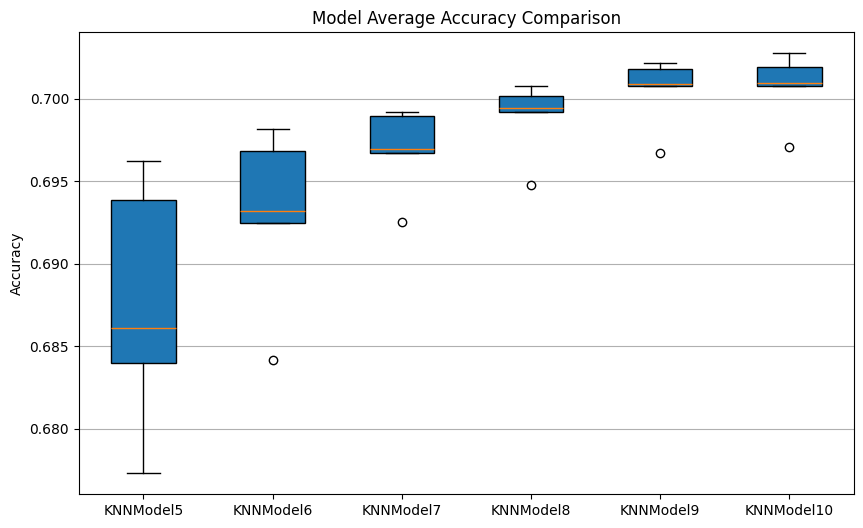

In [ ]:
#Charting Models 5,6,7,8,9 & 10
# Plot accuracies
models = ['KNNModel5', 'KNNModel6', 'KNNModel7', 'KNNModel8', 'KNNModel9', 'KNNModel10']
accuracies = [acc_score5, acc_score6, acc_score7, acc_score8, acc_score9, acc_score10]

plt.figure(figsize=(10, 6))
plt.boxplot(accuracies, labels=models, patch_artist=True)
plt.title("Model Average Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()

In [ ]:
#comparing each model

model_pairs = [("KNNmodel5", "KNNmodel6"), ("KNNmodel5", "KNNmodel7"), ("KNNmodel5", "KNNmodel8"), ("KNNmodel5", "KNNmodel9"), ("KNNmodel5", "KNNmodel10"),
                ("KNNmodel6", "KNNmodel7"), ("KNNmodel6", "KNNmodel8"), ("KNNmodel6", "KNNmodel9"), ("KNNmodel6", "KNNmodel10"),
                 ("KNNmodel7", "KNNmodel8"), ("KNNmodel7", "KNNmodel9"), ("KNNmodel7", "KNNmodel10"),
                ("KNNmodel8", "KNNmodel9"), ("KNNmodel8", "KNNmodel10"),
                ("KNNmodel9", "KNNmodel10")]
model_names = ["KNNmodel5", "KNNmodel6", "KNNmodel7", "KNNmodel8", "KNNmodel9", "KNNmodel10"]  # List of model names
model_accuracies = [acc_score5, acc_score6, acc_score7, acc_score8, acc_score9, acc_score10]  # Corresponding accuracy lists

for model1_name, model2_name in model_pairs:
    # Get the indices of the models in the model_names list
    model1_index = model_names.index(model1_name)
    model2_index = model_names.index(model2_name)

    # Access the accuracies using the indices
    t_statistic, p_value = stats.ttest_rel(model_accuracies[model1_index], model_accuracies[model2_index])
    print(f"Comparing {model1_name} and {model2_name}:")
    print(f"T-statistic: {t_statistic:.3f}")
    print(f"P-value: {p_value:.3f}")
    print("-" * 20)

Comparing KNNmodel5 and KNNmodel6:
T-statistic: -4.256
P-value: 0.013
--------------------
Comparing KNNmodel5 and KNNmodel7:
T-statistic: -4.041
P-value: 0.016
--------------------
Comparing KNNmodel5 and KNNmodel8:
T-statistic: -4.415
P-value: 0.012
--------------------
Comparing KNNmodel5 and KNNmodel9:
T-statistic: -4.959
P-value: 0.008
--------------------
Comparing KNNmodel5 and KNNmodel10:
T-statistic: -4.903
P-value: 0.008
--------------------
Comparing KNNmodel6 and KNNmodel7:
T-statistic: -3.127
P-value: 0.035
--------------------
Comparing KNNmodel6 and KNNmodel8:
T-statistic: -4.058
P-value: 0.015
--------------------
Comparing KNNmodel6 and KNNmodel9:
T-statistic: -4.964
P-value: 0.008
--------------------
Comparing KNNmodel6 and KNNmodel10:
T-statistic: -4.862
P-value: 0.008
--------------------
Comparing KNNmodel7 and KNNmodel8:
T-statistic: -6.836
P-value: 0.002
--------------------
Comparing KNNmodel7 and KNNmodel9:
T-statistic: -11.992
P-value: 0.000
-----------------

#Commentary on KNN Model comparisons

Increasing the K number increases accuracy scores (as can be seen in the Model Average Accuracy Comparison boxplot), and then starts to decreases when the K number increases from 11 (KNNmodel9) to 13 (KNNmodel10).

By comparing the T-stat and p-value of each model, we can see that:

*   The models with higher K numbers have a greather t-statistic, with the largest difference between KNN Model8 and KNN Model9 (t-statistic = -15.366), indicating that the difference between these 2 models is statistically significant.
*   The p-values are below 0.05 in all model comparisons, indicating that the observed differences in average accuracies between the models are statistically significant and not caused by random chance.

KNNModel9 is therefore the most accurate model built in the testing of our KNN algorithms.



---



# 2.2 AI Algorithm 2 - Case-Based Reasoning (CBR)

Case-based reasoning (CBR) is similar to instance-based learning in that it relies on memory of prior examples. However, CBR systems follow a structured four-stage process: Retrieve, Reuse, Revise, and Retain, which allows for solution reuse and improvement.

In our test for using CBR to predict future referral numbers, we will include a method to find the most similar case in our Case-base, use this to predict the value of the new case, and then add the new case to our Case-base.

In [ ]:
#CBRmodel1

x = Monthly_referrals_processed_df[['Year', 'MonthAsNumber', 'HBT', 'Specialty', 'ReferralSource']].to_numpy()

y = Monthly_referrals_processed_df[['NumberOfReferrals']].to_numpy()


class Case:
    def __init__(self, Year, MonthAsNumber, HBT, Specialty, ReferralSource, NumberOfReferrals):
        self.Year = Year
        self.MonthAsNumber = MonthAsNumber
        self.HBT = HBT
        self.Specialty = Specialty
        self.ReferralSource = ReferralSource
        self.NumberOfReferrals = NumberOfReferrals #solution

class CaseBase:
    def __init__(self):
        self.cases = []

    def add_case(self, case):
        self.cases.append(case)

    # Define similarity functions as methods of the CaseBase class
    def Year_similarity(self, a, b):
        return abs(a - b)

    def MonthAsNumber_similarity(self, a, b):
        return abs(a - b)

    def HBT_similarity(self, a, b):
        return 0 if a == b else 1

    def Specialty_similarity(self, a, b):
        return 0 if a == b else 1

    def ReferralSource_similarity(self, a, b):
        return 0 if a == b else 1

    def find_most_similar_case(self, new_case):
        """
        Finds the most similar case based on Euclidean distance.

        Args:
            new_features (numpy array): A numpy array of features for a new case.

        Returns:
            Case: The most similar case based on the Euclidean distance.
        """
        best_match = None
        best_distance = float('inf')

        # Iterate over all existing cases
        for case in self.cases:
            # Calculate the Manhattan distance as a composite similarity measure
            distance = (self.Year_similarity(case.Year, new_case.Year) +
                        self.MonthAsNumber_similarity(case.MonthAsNumber, new_case.MonthAsNumber) +
                        self.HBT_similarity(case.HBT, new_case.HBT) +
                        self.Specialty_similarity(case.Specialty, new_case.Specialty) +
                        self.ReferralSource_similarity(case.ReferralSource, new_case.ReferralSource))

            # Update the best match if the current case is closer
            if distance < best_distance:
                best_distance = distance
                best_match = case

        return best_match



def create_cases_from_df(df):
    case_base = CaseBase()
    for index, row in df.iterrows():
        case = Case(
            Year=row['Year'],
            MonthAsNumber=row['MonthAsNumber'],
            HBT=row['HBT'],
            Specialty=row['Specialty'],
            ReferralSource=row['ReferralSource'],
            NumberOfReferrals=row['NumberOfReferrals']
        )
        case_base.add_case(case)
    return case_base


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=320, test_size=80, random_state=42)
#had to limit test and train data as the code was unable to run otherwise

train_df = pd.DataFrame(x_train, columns=['Year', 'MonthAsNumber', 'HBT', 'Specialty', 'ReferralSource'], index=Monthly_referrals_processed_df.index[:320])
train_df['NumberOfReferrals'] = y_train  # Add the target column

test_df = pd.DataFrame(x_test, columns=['Year', 'MonthAsNumber', 'HBT', 'Specialty', 'ReferralSource']) #index is assigned automatically starting from 0
test_df['NumberOfReferrals'] = y_test # Add the target column
test_df.index = Monthly_referrals_processed_df.index[320:320 + len(x_test)] # Assign the correct subset of the index

# Convert both train and test dataframes to CaseBase
train_case_base = create_cases_from_df(train_df)
test_case_base = create_cases_from_df(test_df)

# Predictions
predictions = []
for index in range(len(x_test)): # loop through the length of X_test
    # Access data using NumPy array indexing
    new_case = Case(
        Year=x_test[index][0],  # Accessing Year from the NumPy array
        MonthAsNumber=x_test[index][1],  # Accessing MonthAsNumber from the NumPy array
        HBT=x_test[index][2],  # Accessing HBT from the NumPy array
        Specialty=x_test[index][3],  # Accessing Specialty from the NumPy array
        ReferralSource=x_test[index][4],  # Accessing ReferralSource from the NumPy array
        NumberOfReferrals=0  # Set to 0 for prediction purposes
    )

    most_similar_case = train_case_base.find_most_similar_case(new_case)

    if most_similar_case:
        adapted_number_of_referrals = most_similar_case.NumberOfReferrals
        predictions.append(adapted_number_of_referrals)
    else:
        predictions.append("No similar case found")

#Create a new DataFrame for predictions with the index from test_df
predictions_df = pd.DataFrame({'predicted_NumberOfReferrals': predictions}, index=test_df.index) # Use test_df's index

#Merge the predictions back into test_df using the shared index
test_df = test_df.merge(predictions_df, how='left', left_index=True, right_index=True)
print(test_df)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Perform t-test
t_statistic, p_value = stats.ttest_rel(y_test.flatten(), predictions)  # Flatten y_test for comparison
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")


     Year  MonthAsNumber      HBT  Specialty  ReferralSource  \
897  2020              1  8000022          1              10   
898  2020              4  8000028          3              13   
899  2020              2  8000022          1              10   
900  2021             10  8000020          1               3   
902  2020              7  8000025          4              17   
..    ...            ...      ...        ...             ...   
995  2022              9  8000032          2              10   
996  2023             11  8000017          4              16   
997  2021              1  8000028          1               7   
998  2023             10  8000019          3               5   
999  2021             11  8000025          3               5   

     NumberOfReferrals  predicted_NumberOfReferrals  
897                0.0                          0.0  
898                0.0                          0.0  
899                0.0                          0.0  
900            

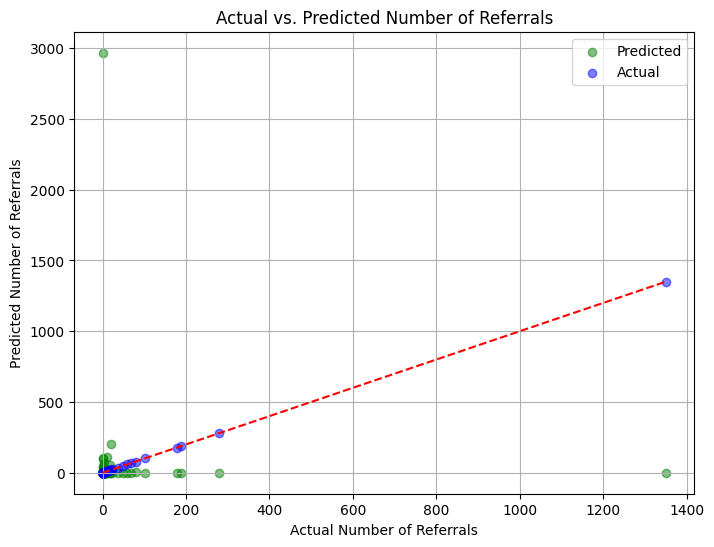

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, c='green', label='Predicted')  # Green dots for predicted
plt.scatter(y_test, y_test, alpha=0.5, c='blue', label='Actual')  # Blue dots for actual (along the diagonal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Number of Referrals")
plt.ylabel("Predicted Number of Referrals")
plt.title("Actual vs. Predicted Number of Referrals")
plt.legend()  # Add a legend to differentiate actual and predicted
plt.grid(True)
plt.show()

The high MAE and RMSE suggest poor model performance. The non-significant T-statistic (-0.370) and P-value (0.712) suggest the model lacks predictive power and needs a lot of improvement.

The scatter plot visualises the inaccuracy of the predicted results compared to the actual results.

Importantly, it should be flagged that only a small subset of the available data was used in this model as using all data from Monthly_referrals_processed_df was resulting in programme crashes.

Using random forests or decision trees to identify the importance of each feature, and inform which ones could be removed or weighted (attempts at this in this model also resulted in programme crashes).



---





##Section 3 - Results of Experimentation

Our goal was to experiment with models that could predict future AHP MSK monthly referral numbers to allow the service to anticipate demand and plan resources accordingly.

We experimented with two models that used historic referral number data, categorised by Month, Healthboard, Specialty and ReferralSource to predict future referral numbers.

Our KNN model was tested with various K numbers, with KNNmodel9 (using K number = 11) yielding the most reliable results (with an average accuracy score of 0.7005). The t-stat and p-value for this model also indicated that it was of statistical significance.

The CBR Model did not work as effectively.  Only a subset of the test/train data could be used in developing the model as it was causing programme crashes when trying to use all available data. The results from the CBR Model test yielded inaccurate results.  

From the experimenting carried out so far, KNN is the most accurate model. Other methods (such as neural networks) could be used in further development to identify the most accurate way to predict future referral numbers.